**1. Data Transformation:**

**Goal**: Prepare the data for analysis by applying transformations.\
**Steps and Hints**:
- **Normalization**: Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.
- **Logarithmic Scaling (Optional)**: Apply logarithmic scaling if the data has a wide range of values. This can be done using np.log.
- **Fourier Transformation**: Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.
- **Tools**: Explore np.fft.fft for Fourier transformation.

**2. Statistical Analysis:**

Goal: Extract statistical insights from the data.
**Steps and Hints:**
- **Descriptive Statistics:** Use pandas describe() function to get an overview of the data.
- **Correlation Analysis**: Calculate and interpret the correlation between variables using pandas corr() function.
- **Inferential Statistics:** Consider conducting hypothesis tests or regression analysis to draw deeper insights.
- **Tools:** Explore scipy.stats for advanced statistical functions.

**3. Data Visualization:**

**Goal:** Create visual representations of your findings.\
**Steps and Hints:**
- **Heatmaps:** Use heatmaps to visualize correlation matrices. This can be done with seaborn.
- **Multi-dimensional Scatter Plots:** Create scatter plots for pairs of variables to explore their relationships. seaborn’s pairplot is useful here.
- **Fourier Transform Visualizations:** Plot the amplitude vs. frequency graphs for the Fourier transformed data.
- **Tools:** Utilize matplotlib and seaborn for creating plots.

**4. Interpretation:**

**Goal:** Write a brief report interpreting the results of your analyses.\
**Steps and Hints:**
- **Discuss Findings:** Interpret the results of your statistical analyses and visualizations. Consider real-world implications or applications of your findings.
- **Relate to Real-World:** Think about how these insights can be applied in practical scenarios or how they align with theoretical knowledge.
- **Reflect on the Process:** Comment on what the data transformations and analyses reveal about the nature of the dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [ ]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [ ]:
# prompt: Normalize the data from -3 to 3

def normalize(x, x_min, x_max):
  value = ((x - x_min) * 6) / (x_max - x_min) - 3
  return value
normalized_data = pd.DataFrame()

normalized_data['Time'] = ninja_data['Time'].apply(lambda x: normalize(x, ninja_data['Time'].min(), ninja_data['Time'].max()))
normalized_data['Temperature'] = ninja_data['Temperature'].apply(lambda x: normalize(x, ninja_data['Temperature'].min(), ninja_data['Temperature'].max()))
normalized_data['Pressure'] = ninja_data['Pressure'].apply(lambda x: normalize(x, ninja_data['Pressure'].min(), ninja_data['Pressure'].max()))
normalized_data['Chemical Concentration'] = ninja_data['Chemical Concentration'].apply(lambda x: normalize(x, ninja_data['Chemical Concentration'].min(), ninja_data['Chemical Concentration'].max()))

ninja_data.head()


,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


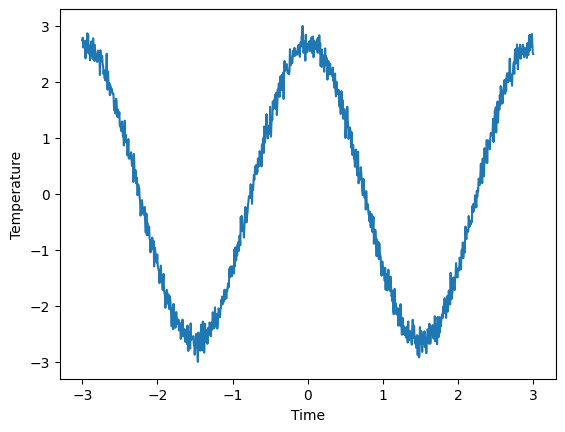

In [ ]:
plt.plot(normalized_data['Time'], normalized_data['Pressure'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.show()

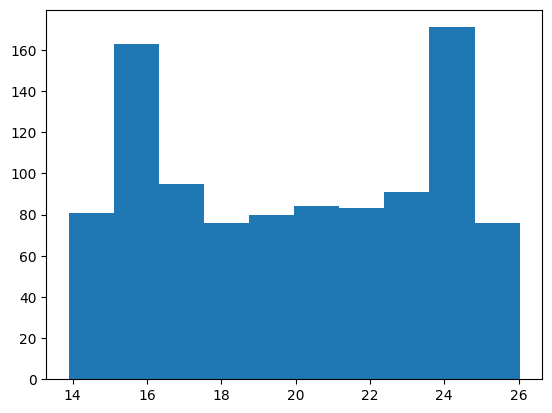

In [ ]:
plt.hist(ninja_data['Temperature'])
plt.show()

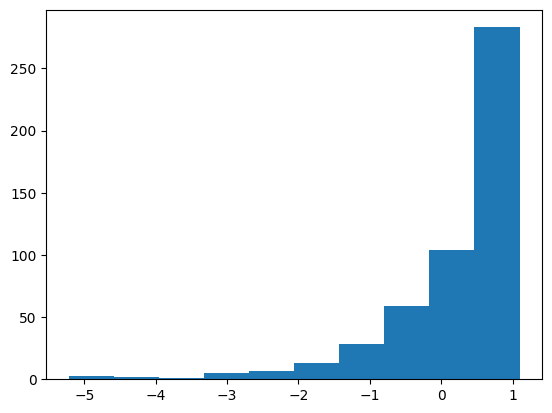

In [ ]:
plt.hist(normalized_data['Temperature'])
plt.show()

In [ ]:
temperature_fft = np.fft.fft(ninja_data[['Time', 'Temperature']])
pressure_fft = np.fft.fft(ninja_data[['Time', 'Pressure']])
chemical_fft = np.fft.fft(ninja_data[['Time', 'Chemical Concentration']])

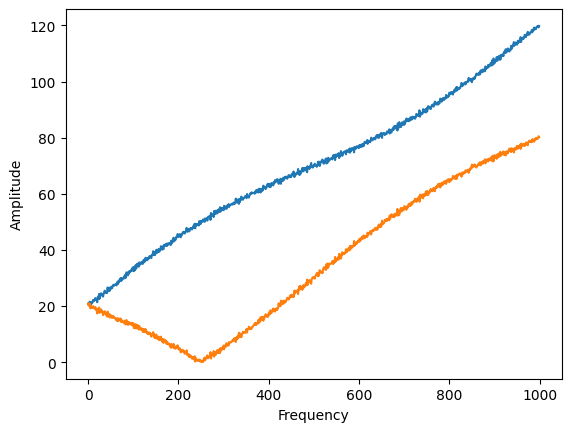

In [ ]:
plt.plot(np.abs(temperature_fft))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

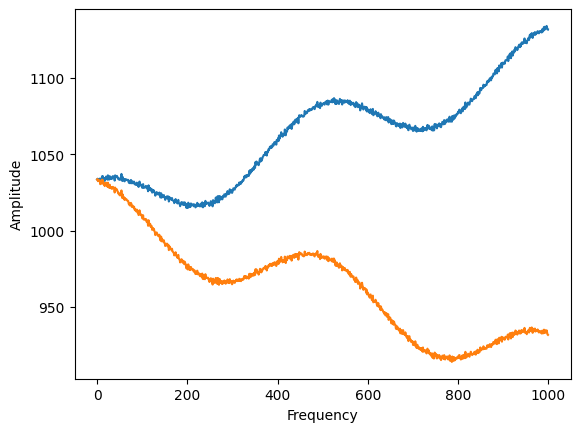

In [ ]:
plt.plot(np.abs(pressure_fft))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

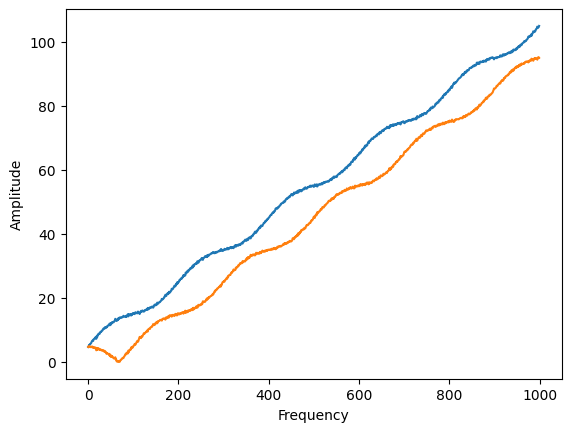

In [ ]:
plt.plot(np.abs(chemical_fft))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 2. Statistical Analysis:

In [ ]:
from scipy import stats

normalized_data.describe()

,Temperature,Pressure,Chemical Concentration
count,505.000000,500.000000,489.000000
mean,0.194476,0.324978,0.252679
std,0.952704,0.816363,0.768659
min,-5.221620,-3.886284,-3.889785
25%,-0.103746,0.041352,-0.068842
50%,0.574978,0.633182,0.531225
75%,0.809483,0.902853,0.784434
max,1.098612,1.098612,1.098612


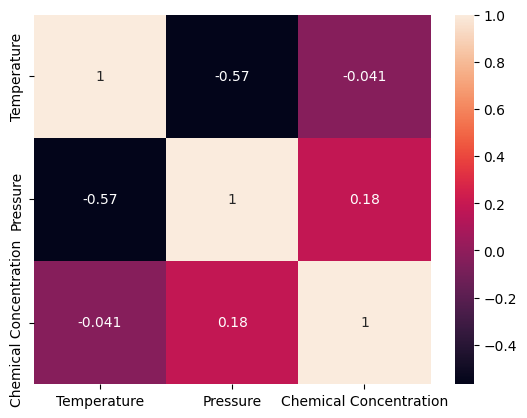

In [ ]:
sns.heatmap(normalized_data.corr(), annot=True)
plt.show()

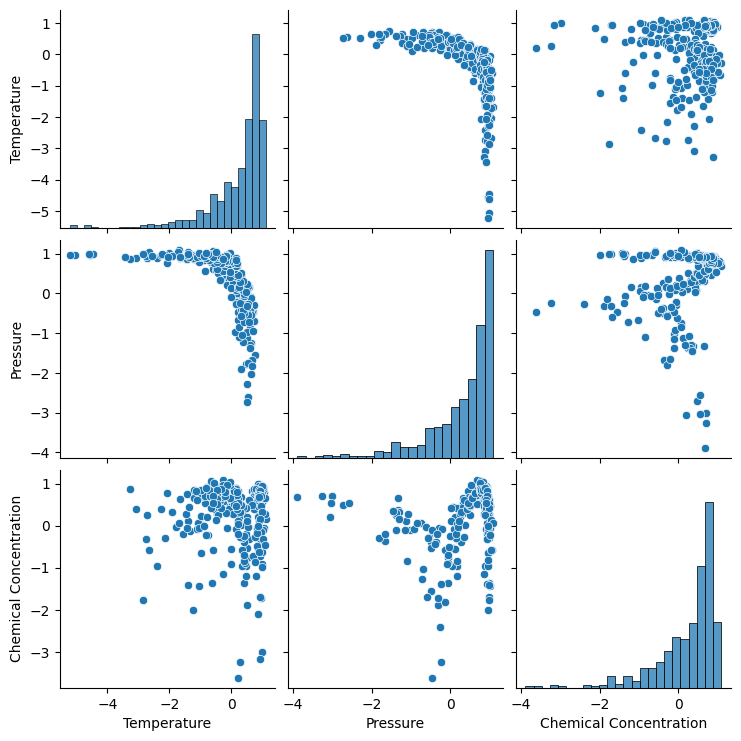

In [ ]:
sns.pairplot(normalized_data)
plt.show()